In [26]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

data=[]
names = []##col names
total =0
# 開啟 CSV 檔案
with open('claim.csv', newline='') as csv_file:
        df = pd.read_csv(csv_file)
        names = list(df.columns.values)
        df.fillna(0, inplace=True)
    ##處理 ILLNESS_CD 出現0的問題\n",
        df=df[(df[names[4]]!=0)]
        print(names)
    ##total
        for i in df['CASE_NO']:
            total+=1
        print(total)


['CASE_NO', 'INSURED_SEX', 'AGE_RANK', 'TENURE', 'ILLNESS_CD', 'illness_code_desc', 'HOSP_CD', 'hospital_name', 'REIMB_AMT_K', 'settle_dt', 'CountNo', 'REIMB_AMT_5Y_K', 'RECENCY_YEAR', 'CountCovNo', 'Sum_afyp_K', 'EFFECTdate', 'TYPE_CODE', 'AFYP_K']
107599


In [50]:
ILLNESS_CD_CTG = []
ILLNESS_CTG = []

for item in df["ILLNESS_CD"]:
        if item not in ILLNESS_CD_CTG :
            ILLNESS_CD_CTG.append(item)
        
    for item in df["illness_code_desc"]:
        if item not in ILLNESS_CTG :
            ILLNESS_CTG.append(item)

    df["illness_code_desc"]
    print("Num of illness = ")
    print(len(ILLNESS_CD_CTG))

IndentationError: unindent does not match any outer indentation level (<ipython-input-50-bb1cde5b8736>, line 8)

[32.03657234383342, 106.15921173885305, 151.95054181717143, 200.21643797353445, 203.1299650852331, 216.62439331296062]
[1019399.0, 1368410.0, 1692257.0, 3848184.0, 3992052.0, 2284908.0]


<BarContainer object of 6 artists>

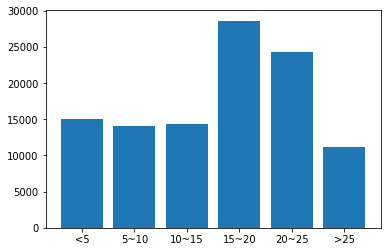

In [80]:
#客戶
tenure = list(df["TENURE"])
tenure_x = ["<5","5~10","10~15","15~20","20~25",">25"]
tenure_count =[0,0,0,0,0,0]
money_within_5 = list(df["REIMB_AMT_5Y_K"]) ##理賠金額
money_total = [0,0,0,0,0,0]

money_spend = list(df["Sum_afyp_K"])##付的保費
money_spend_total = [0,0,0,0,0,0]


for i in range(len(tenure)):

    num = tenure[i]
    dollar_cost =  money_within_5[i]
    dollar_spend = money_spend[i]
    tenure_catg = -1
    if(num<5):
        tenure_catg = 0
    elif(num>=5 and num<10):
        tenure_catg = 1
    elif(num>=10 and num<15):
        tenure_catg = 2
    elif(num>=15 and num<20):
        tenure_catg = 3
    elif(num>=20 and num<25):
        tenure_catg = 4
    elif(num>=25):
        tenure_catg = 5
        
    tenure_count[tenure_catg]+=1
    money_total[tenure_catg] += dollar_cost
    money_spend_total[tenure_catg] += dollar_spend

for i in range(len(tenure_count)):
    money_total[i] = money_total[i]/tenure_count[i]
    money_spend_total[i] = money_spend_total[i]/tenure_count[i]
    

print(money_total)
print(money_spend_total)
    
    
# fig, axs = plt.subplots(2, 2, figsize=(10, 5), sharey=True)        
plt.bar(xlabel,y_count)


([<matplotlib.patches.Wedge at 0x12198df28>,
 [Text(1.0721634605709136, 0.24589736439539836, '<5'),
  Text(0.8022055360595075, 0.7526395404943049, '5~10'),
  Text(0.1539063836157476, 1.0891798864661073, '10~15'),
  Text(-0.9727009555067131, 0.513666089163308, '15~20'),
  Text(-0.34886972240133995, -1.0432113480937657, '20~25'),
  Text(0.9625188342132855, -0.5325011678716752, '>25')],
 [Text(0.58481643303868, 0.13412583512476273, '7.2%'),
  Text(0.43756665603245865, 0.410530658451439, '9.6%'),
  Text(0.0839489365176805, 0.5940981198906039, '11.9%'),
  Text(-0.5305641575491161, 0.2801815031799862, '27.1%'),
  Text(-0.19029257585527634, -0.5690243716875085, '28.1%'),
  Text(0.5250102732072466, -0.2904551824754592, '16.1%')])

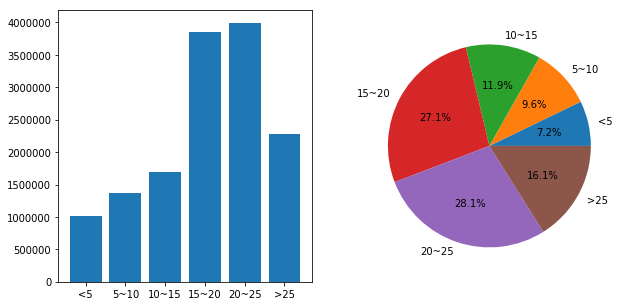

In [81]:
nrows = 1
ncols = 2
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(nrows, ncols, 1)
ax.bar(xlabel,money_spend_total)
#購賣保單金額，以15~25為大宗

ax = fig.add_subplot(nrows, ncols, 2)
ax.pie(money_spend_total, labels=xlabel, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x11d794a58>,
 [Text(1.0932808048103144, 0.1213963831146189, '<5'),
  Text(0.9154902687989155, 0.6098176512159103, '5~10'),
  Text(0.1012997272753174, 1.0953256891235348, '10~15'),
  Text(-0.991738101169652, 0.4758734481859786, '15~20'),
  Text(-0.6444016401701875, -0.8914855725955256, '20~25'),
  Text(0.8065381845717912, -0.7479947572193535, '>25')],
 [Text(0.5963349844419896, 0.06621620897161029, '3.5%'),
  Text(0.49935832843577205, 0.33262780975413286, '11.7%'),
  Text(0.055254396695627664, 0.5974503758855644, '16.7%'),
  Text(-0.5409480551834465, 0.25956733537417015, '22.0%'),
  Text(-0.3514918037291932, -0.48626485777937756, '22.3%'),
  Text(0.43992991885734056, -0.4079971403014655, '23.8%')])

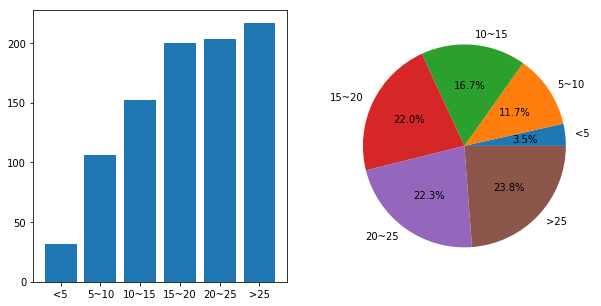

In [79]:

nrows = 1
ncols = 2
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(nrows, ncols, 1)
ax.bar(xlabel,money_total)
#年資越高，五年內平均理賠金額越高   

ax = fig.add_subplot(nrows, ncols, 2)
ax.pie(money_total, labels=xlabel, autopct='%1.1f%%')
#年資15年以上，理賠金額佔百分之七十


